In [ ]:
# Read folder from Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "gdrive/My Drive/ML_DATA"

Mounted at /content/gdrive


In [ ]:
# Path Folder
import os
path = "gdrive/My Drive/ML_DATA"

In [ ]:
# Import library

import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [ ]:
# Read data
data = pd.read_excel(path + "/Bank-Customer-Details.xlsx")
data

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Family,Exited
0,15586133,666,Mid,Female,44,2,2690919000,1,301729000,18,Married,0
1,15713354,597,Mid,Female,22,4,2233629000,1,310328000,45,Single,0
2,15710390,655,North,Female,39,6,2081888000,2,655373000,12,Married,0
3,15732832,707,North,Female,40,5,0,2,180632000,49,Single,0
4,15568449,661,South,Male,38,7,3146147000,1,68864000,44,Single,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,15794849,850,Mid,Male,22,4,2014333000,2,46382000,44,Married,1
8996,15600392,735,North,Female,53,8,2724598000,2,750002000,22,Single,0
8997,15600106,631,North,Male,36,1,0,2,585822000,33,Single,0
8998,15684921,792,South,Male,25,7,3142969000,1,574812000,28,Single,0


In [ ]:
#Check NA
data.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
SpendingScore      0
Family             0
Exited             0
dtype: int64

Descriptive statistics

In [ ]:
# Check type data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       9000 non-null   int64 
 1   CreditScore      9000 non-null   int64 
 2   Geography        9000 non-null   object
 3   Gender           9000 non-null   object
 4   Age              9000 non-null   int64 
 5   Tenure           9000 non-null   int64 
 6   Balance          9000 non-null   int64 
 7   NumOfProducts    9000 non-null   int64 
 8   EstimatedSalary  9000 non-null   int64 
 9   SpendingScore    9000 non-null   int64 
 10  Family           9000 non-null   object
 11  Exited           9000 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 843.9+ KB


Has number of numerical features:  8 and Number of categorical_features:  3

In [ ]:
# Independent variable of type int
numerical_features = ['CustomerId', 'CreditScore', 'Age', 'Tenure',
                       'NumOfProducts', 'Balance', 'EstimatedSalary','SpendingScore']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  8


In [ ]:
#Independent variable of type object
categorical_features = [x for x in data.columns if (x not in numerical_features and x != 'Exited')]
print('Number of categorical_features: ', len(categorical_features))

Number of categorical_features:  3


In [ ]:
# Descriptive statistics include max, min, std, mean,... of variable of type integer
data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,9000.0,1.569077e+07,7.190290e+04,15565701.0,1.562832e+07,1.569047e+07,1.575289e+07,1.581566e+07
CreditScore,9000.0,6.502961e+02,9.694314e+01,350.0,5.830000e+02,6.510000e+02,7.180000e+02,8.500000e+02
Age,9000.0,3.889800e+01,1.048105e+01,18.0,3.200000e+01,3.700000e+01,4.400000e+01,9.200000e+01
Tenure,9000.0,4.967333e+00,2.802821e+00,1.0,2.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01
NumOfProducts,9000.0,1.528889e+00,5.810743e-01,1.0,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Balance,9000.0,1.678519e+09,1.373367e+09,0.0,0.000000e+00,2.139412e+09,2.806643e+09,5.519758e+09
EstimatedSalary,9000.0,4.398055e+08,2.533351e+08,51000.0,2.238330e+08,4.396615e+08,6.564368e+08,8.799670e+08
SpendingScore,9000.0,5.027344e+01,2.897604e+01,1.0,2.500000e+01,5.000000e+01,7.600000e+01,1.000000e+02


In [ ]:
# Descriptive statistics include max, min, std, mean,...variable of type object
data[categorical_features].describe().T

,count,unique,top,freq
Geography,9000,3,North,4541
Gender,9000,2,Male,4918
Family,9000,4,Single,5644


In [ ]:
# correlation between independent variables
data.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Exited
CustomerId,1.000000,0.008397,0.004748,-0.009963,-0.004684,0.015021,0.015688,0.008205,0.014892
CreditScore,0.008397,1.000000,-0.007685,0.000188,0.009486,0.011689,0.001579,0.025190,0.003284
Age,0.004748,-0.007685,1.000000,0.047080,0.032736,-0.033691,-0.011069,0.016516,-0.016919
Tenure,-0.009963,0.000188,0.047080,1.000000,-0.009675,0.009859,0.012072,0.003183,-0.002243
Balance,-0.004684,0.009486,0.032736,-0.009675,1.000000,-0.306693,0.009019,0.009245,0.003625
NumOfProducts,0.015021,0.011689,-0.033691,0.009859,-0.306693,1.000000,0.020468,-0.001799,-0.001878
EstimatedSalary,0.015688,0.001579,-0.011069,0.012072,0.009019,0.020468,1.000000,0.000798,-0.007799
SpendingScore,0.008205,0.025190,0.016516,0.003183,0.009245,-0.001799,0.000798,1.000000,0.005991
Exited,0.014892,0.003284,-0.016919,-0.002243,0.003625,-0.001878,-0.007799,0.005991,1.000000


In [ ]:
# How to check the correlation between the independent variable and the dependent variable
pd.DataFrame(data.corr().iloc[:,-1])

,Exited
CustomerId,0.014892
CreditScore,0.003284
Age,-0.016919
Tenure,-0.002243
Balance,0.003625
NumOfProducts,-0.001878
EstimatedSalary,-0.007799
SpendingScore,0.005991
Exited,1.000000


In [ ]:
#Converting categorical features
nums = []
lbl=preprocessing.LabelEncoder()
for col in data.loc[: , data.dtypes==np.object].columns:
  data[col]=lbl.fit_transform(data[col])
  #to know the meaning of numbers
  directory={index: label for index, label in enumerate(lbl.classes_)}
  nums.append(directory)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
data.head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Family,Exited
0,15586133,666,0,0,44,2,2690919000,1,301729000,18,1,0
1,15713354,597,0,0,22,4,2233629000,1,310328000,45,3,0
2,15710390,655,1,0,39,6,2081888000,2,655373000,12,1,0
3,15732832,707,1,0,40,5,0,2,180632000,49,3,0
4,15568449,661,2,1,38,7,3146147000,1,68864000,44,3,0
5,15694349,714,2,1,44,7,0,1,30462000,11,3,0
6,15801441,670,0,0,35,2,1750891000,1,874733000,89,1,0
7,15581871,504,0,1,42,7,2888322000,2,658670000,72,3,0
8,15720713,850,1,0,29,10,0,2,879013000,56,1,0
9,15667458,764,0,1,28,10,2728510000,1,731228000,80,3,0


In [ ]:
# Target: dependent variable
# Independent variables
target = ['Exited']
features = list(set(list(data.columns)) - set(target))

In [ ]:
print(target)
print(features)

['Exited']
['Geography', 'Age', 'CustomerId', 'Tenure', 'SpendingScore', 'NumOfProducts', 'Family', 'Gender', 'Balance', 'EstimatedSalary', 'CreditScore']


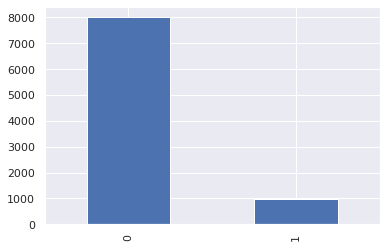

In [ ]:
# visualization of count variable target
data["Exited"].value_counts().plot(kind="bar")

Variable TARGET with the number of observations of 0: retained is 8 times larger than the number of observations of group 1: closed account with bank. That leads, when performing the division of the train and test sets, it will lead to an imbalance of the dataset. That seriously affects the prediction results and the reliability of any applied algorithm model.

The sample has an imbalance phenomenon when group 1 accounts for only about 11% and the majority group accounts for 89%. An unbalanced sample can lead to a number of harms to the model, such as:

The model's prediction results only favor one class. Even in some cases the predictive model only gives a single class which is the majority class.
It is easy to misinterpret a good model because the model's Accuracy for unbalanced samples is often very high. In this case, we need to use alternative indexes such as precision, recall, F1-Score, Kappa, ROC Curve.

When we encounter sample imbalance, we can use many different methods to change the sample to equilibrium. One of those methods is:
- Collect more data for the minority sample if it is practically feasible to collect more data.
- resampling
- Synthetic Minority Over-sampling Technique - SMOTE
...




In this case study, oversampling is used to overcome the imbalance of data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


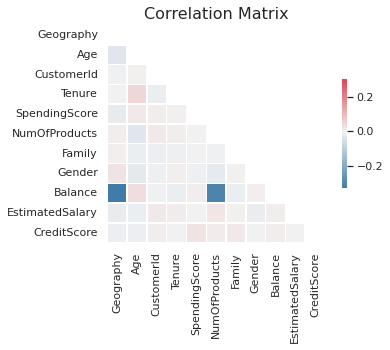

In [ ]:
# matrix correlation between independent variables
def plot_correlation_matrix(corr_mat):
 sns.set(style="white")
 mask = np.zeros_like(corr_mat, dtype=np.bool)
 mask[np.triu_indices_from(mask)] = True
 fig, ax = plt.subplots()
 cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
 sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5,
 cbar_kws={"shrink": .5}, ax=ax)
 ax.set_title('Correlation Matrix', fontsize=16)
 sns.set(style="darkgrid")
corr_mat = data[features].select_dtypes(include='number').corr()
plot_correlation_matrix(data[features].corr())

The degree of correlation between variables only fluctuates in the range (-0.2,0.2). Ranked in the lowest level and does not occur multicollinearity when implementing any algorithm model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48c81a6ad0>,
      dtype=object)

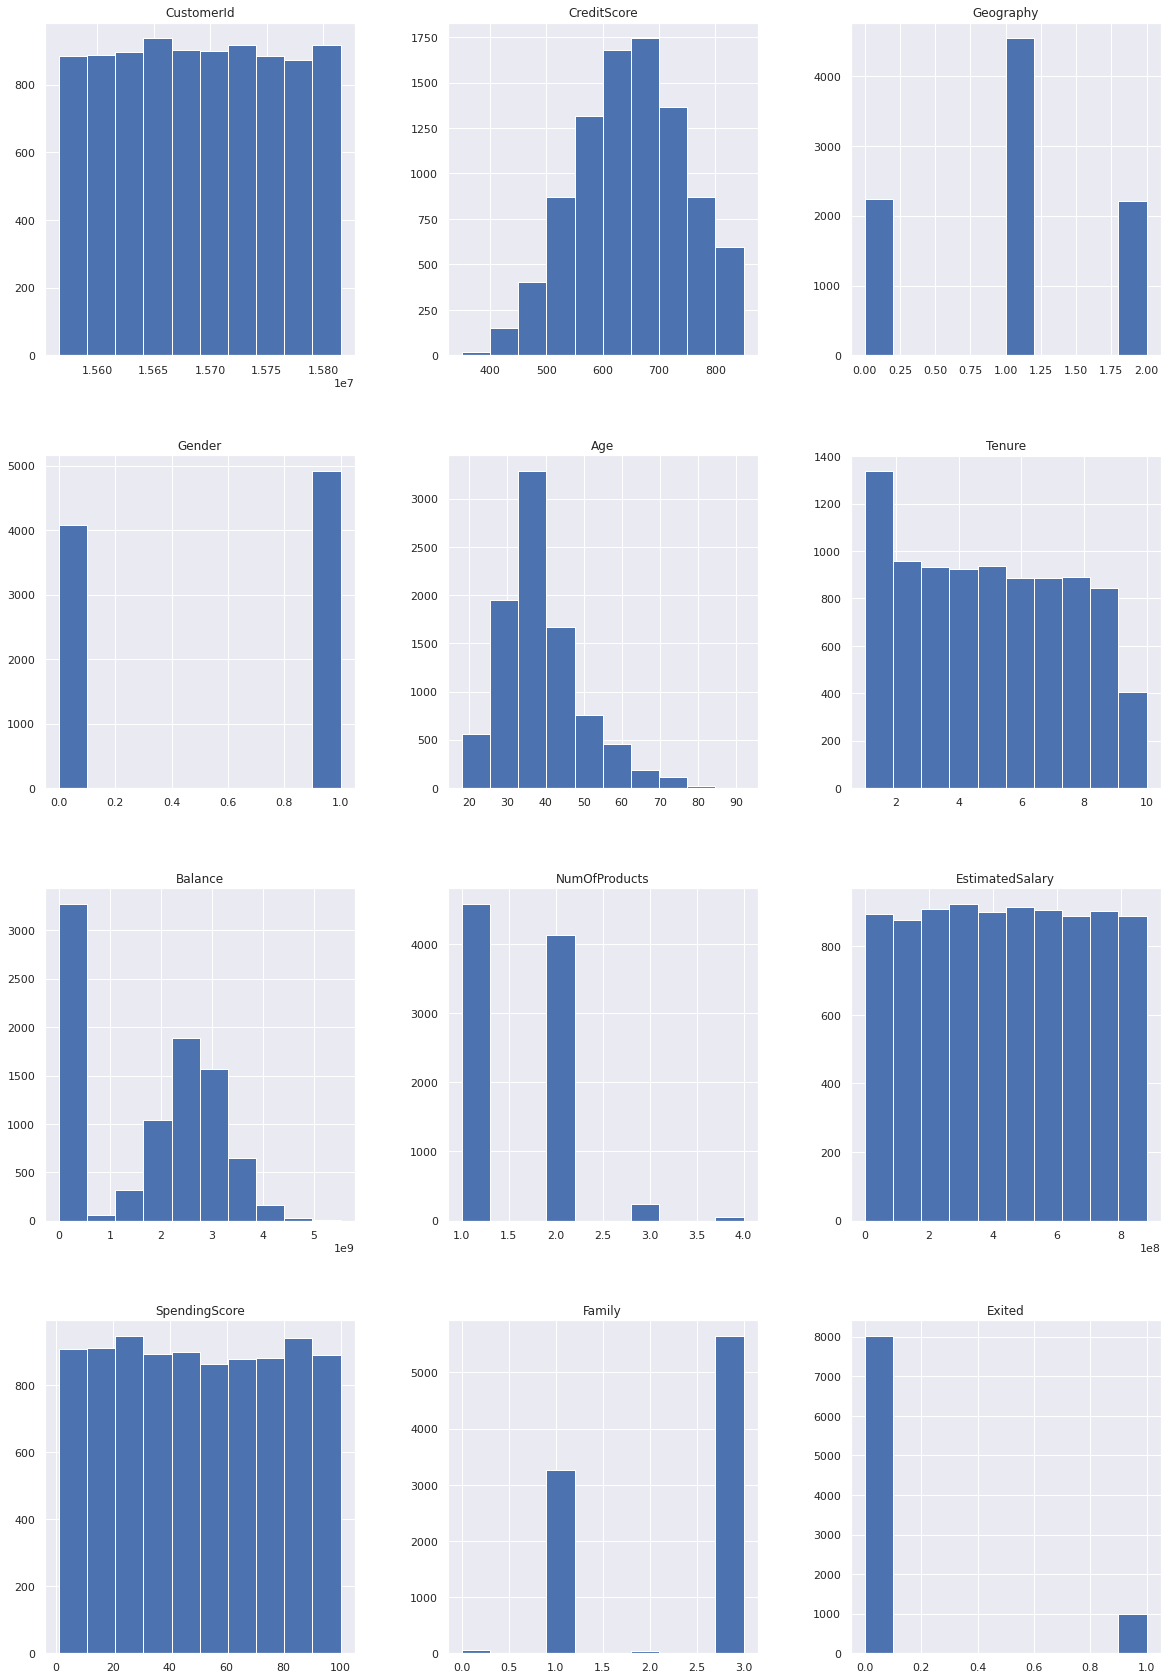

In [ ]:
# Visualization features
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(figsize=(20,30))

The graph shows the distribution between factor in variables. 
There is a fairly even distribution of factors in variables such as : CustomerId, SpendingScore, Credit Score, Tenure, EstimateSalary.

However, in some variables uneven distribution, leading to unbalanced data

The special thing of this model when looking at the column of the Balance variable, the majority has a value of =0. It proves that keeping the account at class 0 but the customer does not use the account (that is the same as closing the bank account)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


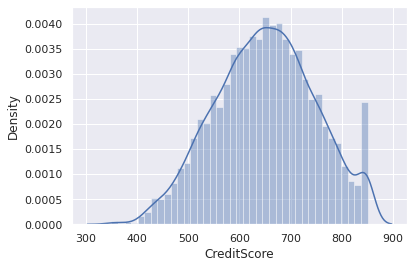

In [ ]:

sns.distplot(data['CreditScore'])

If the Decision Tree algorithm is used, when building a decision tree, if the depth is arbitrary, the tree will be correctly classified with the training data, leading to the model being able to predict poorly on the test set, then the model overfitting (or high variance). The use of Decision tree algorithm with too many observed variables: 11 independent variables make the decision tree construction too many cases and the gini ratio is not high, so the model is difficult to classify and observe, and importantly, unreliable level of prediction. In this model, using the Random Forest algorithm, which consists of many decision trees, each tree has a random element to give the best prediction results. Besides that, Random forests also offers a good feature selection index. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. Therefore, choosing to implement this algorithm to optimize research results.



In [ ]:
# Split test, train data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
# Count target variable
data[target].value_counts()

Exited
0         8011
1          989
dtype: int64

Imbalance in target data_set

In [ ]:
# ROC
from sklearn.metrics import roc_curve, auc

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


OVER SAMPLE

As mentioned above, the oversample method used in this study helps to balance the sample when dividing the train and test sets to achieve more optimal prediction results.

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_train

,Geography,Age,CustomerId,Tenure,SpendingScore,NumOfProducts,Family,Gender,Balance,EstimatedSalary,CreditScore
2310,1,40,15683560,7,35,2,3,0,0,809439000,642
7234,0,27,15589493,1,85,2,3,1,2696151000,297490000,716
1197,0,47,15709232,5,59,2,3,0,3456188000,288120000,586
4829,1,29,15575002,4,24,1,3,1,3095860000,159373000,676
2377,0,43,15802207,4,16,2,3,1,2424016000,385164000,769
...,...,...,...,...,...,...,...,...,...,...,...
5734,2,36,15682541,6,25,1,3,0,2910858000,68036000,616
5191,0,45,15687491,9,75,1,3,1,2226571000,388129000,817
5390,1,33,15683553,5,45,2,3,0,0,514704000,788
860,2,57,15611759,8,56,2,1,0,2789079000,582113000,850


In [ ]:
#Oversampling X_train, y_train
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [ ]:
X_train_over

,Geography,Age,CustomerId,Tenure,SpendingScore,NumOfProducts,Family,Gender,Balance,EstimatedSalary,CreditScore
0,1,40,15683560,7,35,2,3,0,0,809439000,642
1,0,27,15589493,1,85,2,3,1,2696151000,297490000,716
2,0,47,15709232,5,59,2,3,0,3456188000,288120000,586
3,1,29,15575002,4,24,1,3,1,3095860000,159373000,676
4,0,43,15802207,4,16,2,3,1,2424016000,385164000,769
...,...,...,...,...,...,...,...,...,...,...,...
14437,1,49,15760216,10,4,1,3,0,0,811689000,718
14438,2,38,15682860,6,64,2,1,1,0,459333000,769
14439,0,43,15570289,8,81,1,1,1,2275002000,294330000,697
14440,1,58,15646566,9,64,1,3,0,4134054000,157631000,763


In [ ]:
y_train_over

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
14437,1
14438,1
14439,1
14440,1


In [ ]:
# y train data after oversampling 
y_train_over.value_counts()

Exited
0         7221
1         7221
dtype: int64

Evenly distributed between layers 0 and 1

RANDOM FOREST

In [ ]:
# Import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
# Build Random Forest model
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_over.values, y_train_over.values.ravel())

# Prediction depends on the value variable
y_pred = RF_classifier.predict(X_test)

#Confuse matrix
print(confusion_matrix(y_test,y_pred))

# Classification report
print(classification_report(y_test,y_pred))

# Ratio accuracy
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[789   1]
 [109   1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       790
           1       0.50      0.01      0.02       110

    accuracy                           0.88       900
   macro avg       0.69      0.50      0.48       900
weighted avg       0.83      0.88      0.82       900

Random Forest accuracy:  0.8777777777777778


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In the matrix table of confusion, diagonal values ​​represent correct predictions, while non-diagonal elements represent incorrect predictions. Accordingly, 789 and 1 are correct predictions and 109 and 1 are incorrect predictions.

The higher the precision, the higher the number of predictive model scores that are positive. Precision = 1, that is, all the points predicted by the model as Positive are correct, or there are no points labeled as Negative that the model mistakenly predicts as Positive. Precision will need to be given more importance when choosing models with specific problems when mistakenly receiving False Positive brings bad results. For example, in the article, the probability of closing the card is very high, but keeping the report rate is quite low with the Precision of 0 and 1 being (0.88 and 0.5 respectively). That makes the model not really good. And that is also part of the reason why users open accounts but do not use them.


The above formula means the ratio of the true positives received correctly to the total number of true positives. Thus, high Recall means low rate of missing real positive samples. Recall = 1, i.e. all points labeled as Positive are recognized by the model. Therefore, Recall should be given a higher weight when considering choosing the best model when misrepresenting real Positive labels as False Negative has unpredictable consequences. Recall of forecast account retention rate is equal to True Negative Rate (0.85), Recall of forecast account closure rate is equal to True Positive Rate (0.94)

F1-score is the harmonic mean of precision and recall (assuming these two quantities are different from zero). F1_score of the model when predicting a fairly high retention rate (0.93) but a very very low close rate (0.02)

Accuracy raito pretty high ( aproximate 88%)



In [ ]:
# The importance of the feature variables
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
2,Geography,0.160258
9,SpendingScore,0.156716
10,Family,0.153449
4,Age,0.135527
1,CreditScore,0.118582
8,EstimatedSalary,0.110729
3,Gender,0.077460
0,CustomerId,0.027895
5,Tenure,0.026954
6,Balance,0.019855


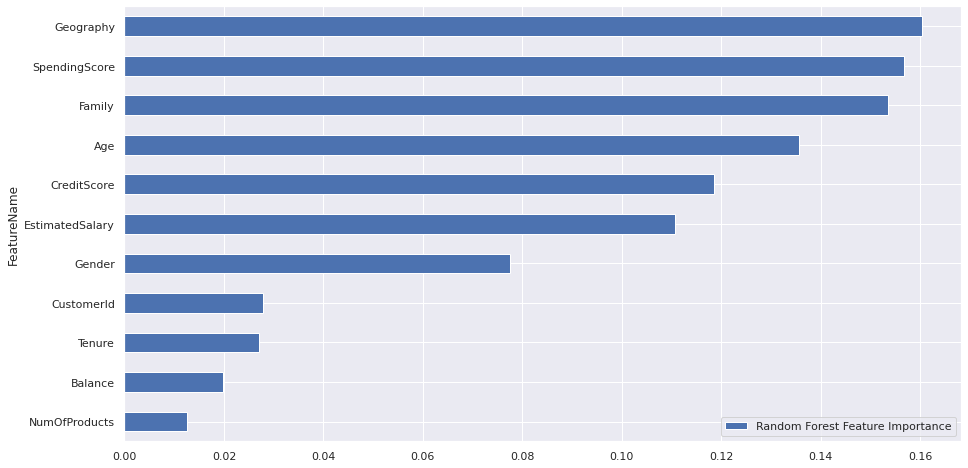

In [ ]:
# Visualization feature feature
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

The importance of the variables is ordered from highest to lowest:
Geography, SpendingScore, Family, Age, Credit Score,...

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


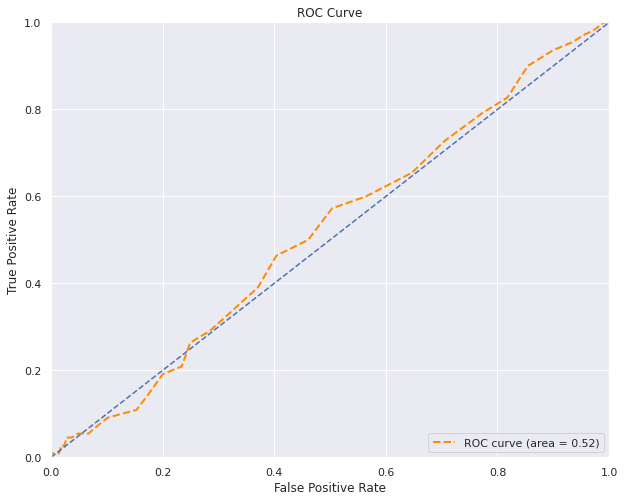

In [ ]:
# ROC
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)


The curve is close to the 45 degree diagonal in ROC space, which proves the accuracy of the test is very poor.
The area under the curve, limited to ROC space, is a measure of test accuracy.1 is optimal, 0.5 is poor. This area is meant to be a measure of the ability to distinguish good or bad. In this case, the area seems insignificant. Prove that the model is not efficient.

In [ ]:
# Import data test
data_test = pd.read_csv(path + "/test_sample_data.csv")
data_test

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Family,Exited
0,15771442,633,North,Male,40,4,3312716000,1,152551000,45,Single,0
1,15700174,733,South,Female,30,1,1833024000,1,254184000,38,Single,0
2,15747503,705,South,Male,44,1,4060147000,1,302985000,39,Single,0
3,15599433,660,Mid,Male,35,8,1290111000,1,874166000,97,Single,0
4,15763194,643,North,Male,34,7,0,2,441338000,21,Married,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,15595883,540,Mid,Male,39,4,2800123000,1,71061000,85,Married,0
996,15790599,756,Mid,Female,39,5,3285989000,2,480033000,78,Married,0
997,15665087,595,Mid,Female,26,8,2608050000,1,665246000,93,Single,1
998,15660602,464,Mid,Male,33,8,3614264000,2,16325000,15,Single,0


In [ ]:
#Converting categorical features
nums = []
lbl=preprocessing.LabelEncoder()
for col in data_test.loc[: , data_test.dtypes==np.object].columns:
  data_test[col]=lbl.fit_transform(data_test[col])
  #to know the meaning of numbers
  directory={index: label for index, label in enumerate(lbl.classes_)}
  nums.append(directory)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
# Prepare data_test
X_test_1 = data_test[features]
y_test_1 = data_test[target]


In [ ]:
X_test_1

,Geography,Age,CustomerId,Tenure,SpendingScore,NumOfProducts,Family,Gender,Balance,EstimatedSalary,CreditScore
0,1,40,15771442,4,45,1,3,1,3312716000,152551000,633
1,2,30,15700174,1,38,1,3,0,1833024000,254184000,733
2,2,44,15747503,1,39,1,3,1,4060147000,302985000,705
3,0,35,15599433,8,97,1,3,1,1290111000,874166000,660
4,1,34,15763194,7,21,2,1,1,0,441338000,643
...,...,...,...,...,...,...,...,...,...,...,...
995,0,39,15595883,4,85,1,1,1,2800123000,71061000,540
996,0,39,15790599,5,78,2,1,0,3285989000,480033000,756
997,0,26,15665087,8,93,1,3,0,2608050000,665246000,595
998,0,33,15660602,8,15,2,3,1,3614264000,16325000,464


In [ ]:
y_test_1

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,1
998,0


In [ ]:
# Build model Random Forest with data_test
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_over.values, y_train_over.values.ravel())

y_pred = RF_classifier.predict(X_test_1)
print(confusion_matrix(y_test_1,y_pred))
print(classification_report(y_test_1,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test_1, y_pred))

[[881   3]
 [115   1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       884
           1       0.25      0.01      0.02       116

    accuracy                           0.88      1000
   macro avg       0.57      0.50      0.48      1000
weighted avg       0.81      0.88      0.83      1000

Random Forest accuracy:  0.882


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


After applying the test set to the data train, in class 0 : it works quite well. However, class 1 is still not able to overcome the precision ratio (even lower), the F_score ratio, and recall are almost zero. About the correct prediction rate is also relatively good. But the general assessment of the Random Forest algorithm model is not the most optimal. But compared to other models, it is relatively stable. Part of the model prediction is not good because the data is unbalanced, so the prediction is not as accurate as expected